In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('House Price India.csv')
dataset.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [5]:
dataset.describe().columns
dataset = dataset.drop(['id','Date', 'Lattitude', 'Longitude'], axis = 1)
dataset.describe().columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'living_area_renov',
       'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [6]:
dataset.isna().sum()
dataset.duplicated().sum()

0

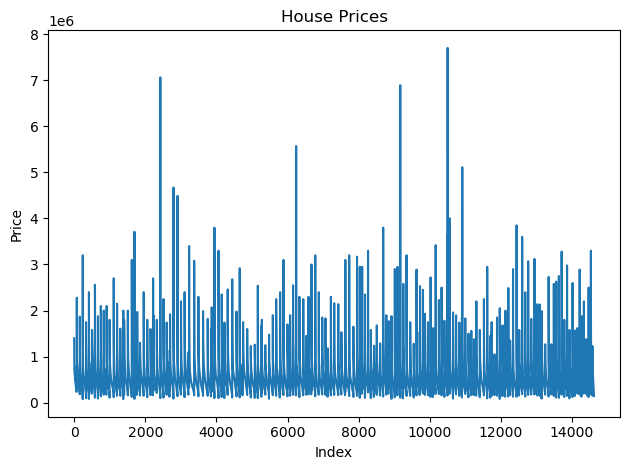

In [7]:
plt.plot(dataset['Price'])
plt.title('House Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

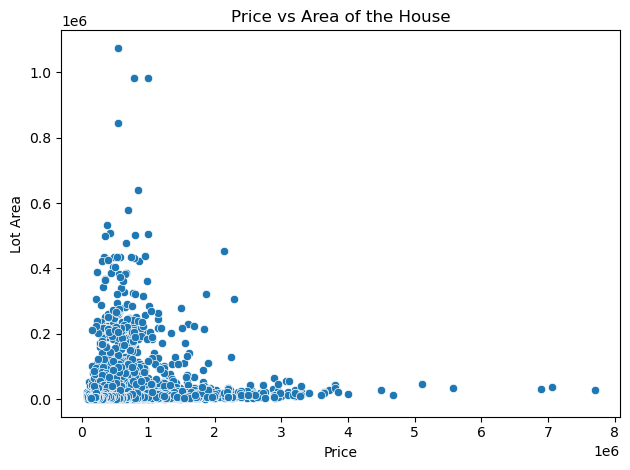

In [8]:
sns.scatterplot(x='Price', y='lot area', data=dataset)
plt.title('Price vs Area of the House')
plt.xlabel('Price')
plt.ylabel('Lot Area')
plt.tight_layout()
plt.show()

In [12]:
corr_col = dataset[['number of bedrooms', 'number of bathrooms','living area', 'lot area',
       'number of floors', 'Area of the house(excluding basement)', 'Area of the basement', 'Number of schools nearby',
       'Distance from the airport', 'Price']]

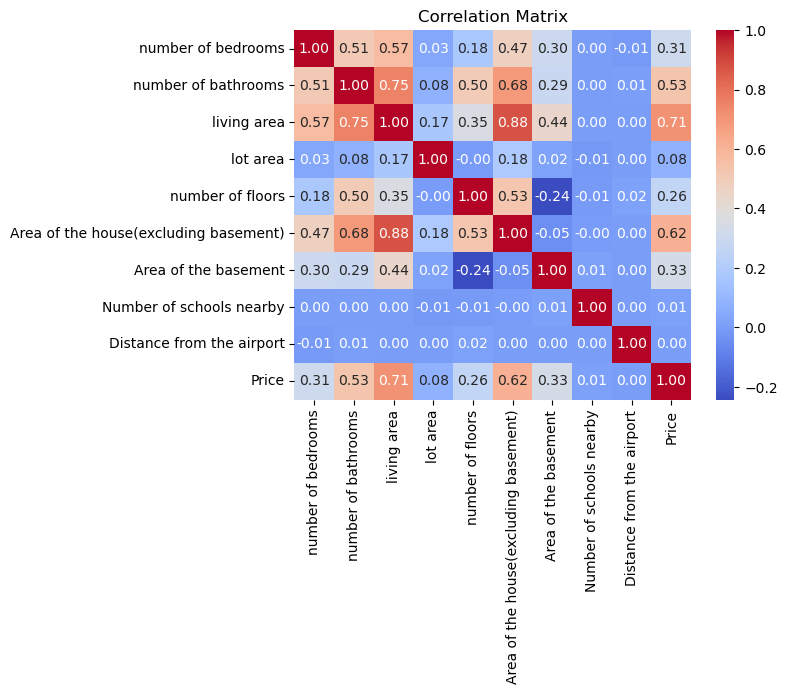

In [13]:
sns.heatmap(corr_col.corr(numeric_only=True), annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

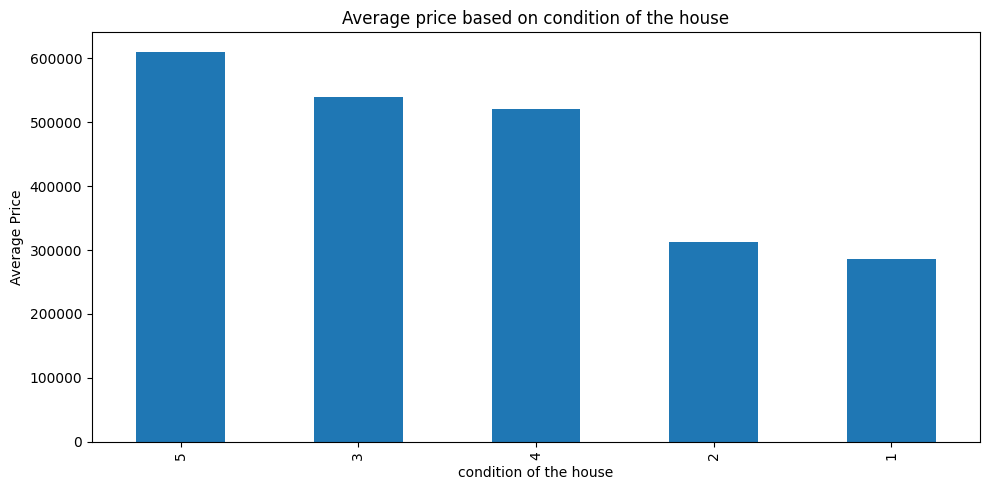

In [48]:
dataset.groupby('condition of the house')['Price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Average price based on condition of the house')
plt.xlabel('condition of the house')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [49]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [53]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print('Decision Tree Mean Squared Error:', mse1)
print('Decision Tree R-squared:', r2_1)
print('Decision Tree Score:', model1.score(x_test, y_test))

Decision Tree Mean Squared Error: 44931395191.45725
Decision Tree R-squared: 0.6964014334390639
Decision Tree Score: 0.6964014334390639


ALTERNATE MODEL

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49059018182.98766
R-squared: 0.6685113486065579


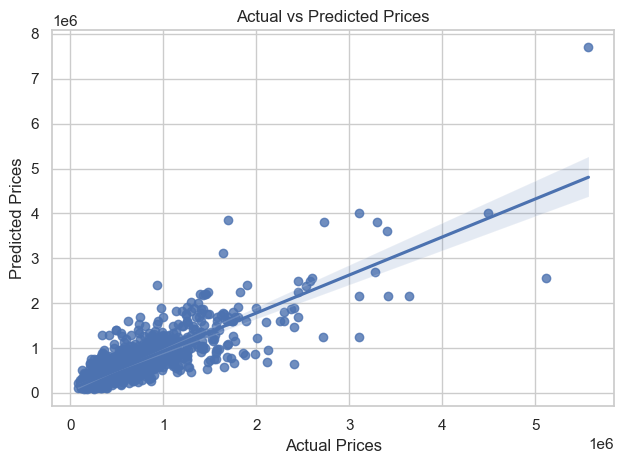

In [ ]:
#sns.set(style='whitegrid')
#plt.scatter(y_test, y_pred1)

sns.regplot(x=y_test, y=y_pred1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

BEST MODEL SO FAR

In [64]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f'Mean Squared Error : {mse3}')
print(f'R-Squared: {r2_3}')

Mean Squared Error : 25976014200.820484
R-Squared: 0.8244817316993747


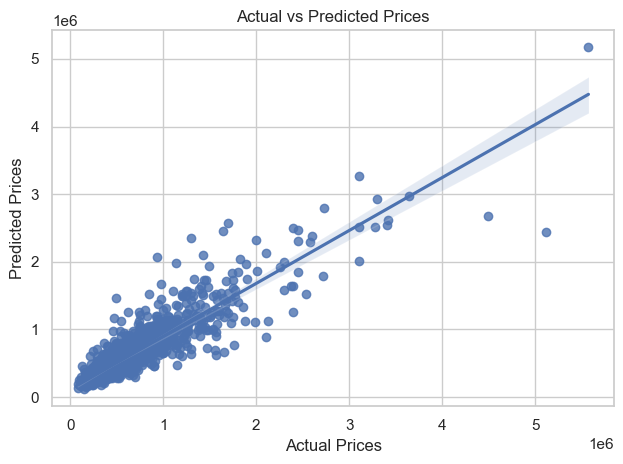

In [65]:
sns.regplot(x=y_test, y=y_pred3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

In [72]:
y_pred3 = model3.predict(x_test)
print('Actual values vs Predicted values:\n')
print(np.concatenate((y_pred3.reshape(len(y_pred3), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

Actual values vs Predicted values:

[[ 537598.76  546800.  ]
 [ 492998.63  550000.  ]
 [ 379150.3   399950.  ]
 ...
 [ 598811.14  695000.  ]
 [ 461164.95  448000.  ]
 [1524958.08 2530000.  ]]


In [66]:
x.describe().columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'living_area_renov',
       'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

user_input = np.array([[4, 2.25, 2200, 11250, 1.5, 0, 0, 5, 7, 1300, 900, 1920, 0, 122010, 2320, 10814, 2, 53]])
user_input = user_input.reshape(1, -1)
predicted_price = model3.predict(user_input)

print(f'Predicted Price : {predicted_price[0]}')

Predicted Price : 560124.11
